In [1]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keras is only to get boston housing data
# boston housing is also here: from sklearn.datasets import load_boston
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

/Users/biansiwei/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#read data
Changping_data_raw=pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
Changping_data = np.array(Changping_data_raw)

In [3]:
# Training set
data_pm25 = Changping_data[:,11:16] #input data
lable_pm25 = Changping_data[:,8] #output label

data_pm25 = np.array(data_pm25)
lable_pm25 = np.array(lable_pm25)

mean = data_pm25.mean(axis=0, dtype=float)
std = data_pm25.std(axis=0, dtype=float)

In [4]:
train_data = data_pm25[0:int(len(data_pm25)*0.8)]
train_label = lable_pm25[0:int(len(data_pm25)*0.8)]
test_data = data_pm25[int(len(data_pm25)*0.8):int(len(data_pm25))]
test_label = lable_pm25[int(len(data_pm25)*0.8):int(len(data_pm25))]

train_data = np.array(train_data, dtype= np.float32)
train_label = np.array(train_label, dtype= np.float32)
test_data = np.array(test_data, dtype= np.float32)
test_label = np.array(test_label, dtype= np.float32)

train_data = (train_data - mean) / std # (train_data - min) / (max-min) 
test_data = (test_data - mean) / std

order = np.argsort(np.random.random(train_label.shape))
train_data = train_data[order]
train_label = train_label[order]

print(train_data.shape,train_label.shape,test_data.shape,test_label.shape)

(1100, 5) (1100,) (275, 5) (275,)


In [5]:
# XGB parameters (extreme gradient boosting)
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 2000,  # number of trees to use
              'learning_rate': 0.01, 
              'max_depth': 30,       # how many levels are in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 1,
              'reg_lambda': 0,}

In [6]:
model = XGBRegressor(**params_xgb)

In [7]:
%%time
model.fit(train_data, train_label)

CPU times: user 30.7 s, sys: 8.38 s, total: 39 s
Wall time: 7.71 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=30, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=0, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

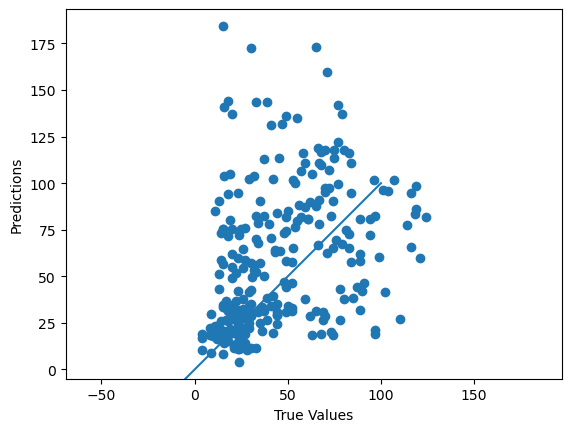

In [8]:
test_predictions = model.predict(test_data)

plt.scatter(test_label, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

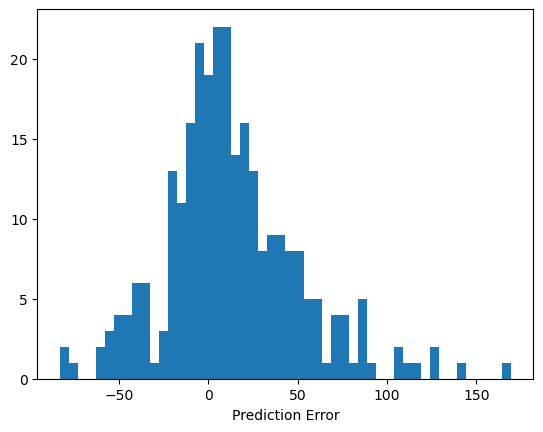

In [9]:
# histogram
error = test_predictions - test_label
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()

In [10]:
mse = mean_squared_error(test_label, test_predictions)
print(f'the mse is {mse}')

the mse is 1591.4814453125


In [11]:
from sklearn.metrics import r2_score
r2_score(test_label,test_predictions)

-0.9627512851883224